In [1]:
import pandas as pd

In [2]:
fenc = pd.read_csv('../data/fatalencounters.csv')

In [3]:
states_pop = pd.read_csv('../data/usa_race_states.csv')

In [4]:
tx_race_hist = fenc[fenc['Location of death (state)'] == 'TX'].groupby('Subject\'s race')['Unique identifier'].count()

In [5]:
tx_race_hist/tx_race_hist.sum()

Subject's race
African-American/Black     0.219780
Asian/Pacific Islander     0.009491
European-American/White    0.319181
Hispanic/Latino            0.314186
Middle Eastern             0.004496
Native American/Alaskan    0.002498
Race unspecified           0.130370
Name: Unique identifier, dtype: float64

In [6]:
tx_races = states_pop[states_pop['state'] == 'TX'][['white', 'black', 'native', 'asian', 'island', 'other', 'two']]

In [7]:
tx_races.T/tx_races.T.sum()

,44
white,0.748894
black,0.118805
native,0.004766
asian,0.042354
island,0.000816
other,0.059757
two,0.024608


In [8]:
def state_race_killings_perc(state):
    state_race_hist = fenc[fenc['Location of death (state)'] == state].groupby('Subject\'s race')['Unique identifier'].count()
    return state_race_hist/state_race_hist.sum()

def state_race_perc(state):
    state_races = states_pop[states_pop['state'] == state][['white', 'black', 'native', 'asian', 'island', 'other', 'two']]
    return state_races.T/state_races.T.sum()

In [10]:
state_race_killings_perc('CA')

Subject's race
African-American/Black     0.135212
Asian/Pacific Islander     0.033609
European-American/White    0.185884
Hispanic/Latino            0.271200
Middle Eastern             0.003102
Native American/Alaskan    0.006722
Race unspecified           0.364271
Name: Unique identifier, dtype: float64

In [11]:
state_race_perc('CA')

,4
white,0.618066
black,0.058961
native,0.007471
asian,0.136954
island,0.003914
other,0.129479
two,0.045154


In [12]:
def compare(state):
    race_demo = state_race_perc(state)
    race_killings = state_race_killings_perc(state)
    

    black_killings = 0
    
    if 'African-American/Black' in race_killings:
        black_killings += float(race_killings['African-American/Black'])
    
    white_killings = 0

    if 'European-American/White' in race_killings:
        white_killings += race_killings['European-American/White']

    if 'Hispanic/Latino' in race_killings:
        white_killings += race_killings['Hispanic/Latino']
    
    white_killings = float(white_killings)
    
    black = float(black_killings/race_demo.T['black'])
    white = float(white_killings/race_demo.T['white'])

    return (state, black,white)

In [15]:
sl =[]
for s in states_pop['state']:
    sl += [compare(s)]
    
comp_df = pd.DataFrame(sl, columns=['state', 'b', 'w'])

In [16]:
race_killings = state_race_perc('TX')

In [17]:
race_killings.T['black']

44    0.118805
Name: black, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f809f753b00>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f809d487358>]], dtype=object)

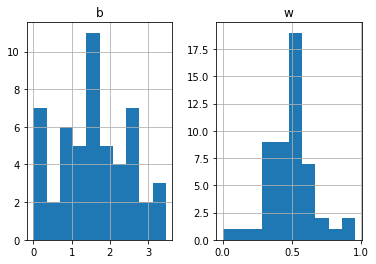

In [18]:
%matplotlib inline
comp_df[['b', 'w']].hist()

# How many states the rates are bigger than expected?

In [19]:
comp_df[comp_df['b'] > 1].shape

(37, 3)

In [25]:
len(comp_df[comp_df['b'] > 1])/len(comp_df)

0.7115384615384616

In [26]:
len(comp_df[comp_df['w'] > 1])/len(comp_df)

0.0

In [23]:
comp_df['b'].mean()

1.5969280148050846

In [24]:
comp_df['w'].mean()

0.49451310472605337

## More 70% than states have a higher killer (1.6 on average) percentage  for black than expected


## No states have a higher killer percentage (0.5 average of expected) for white than expected
